In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

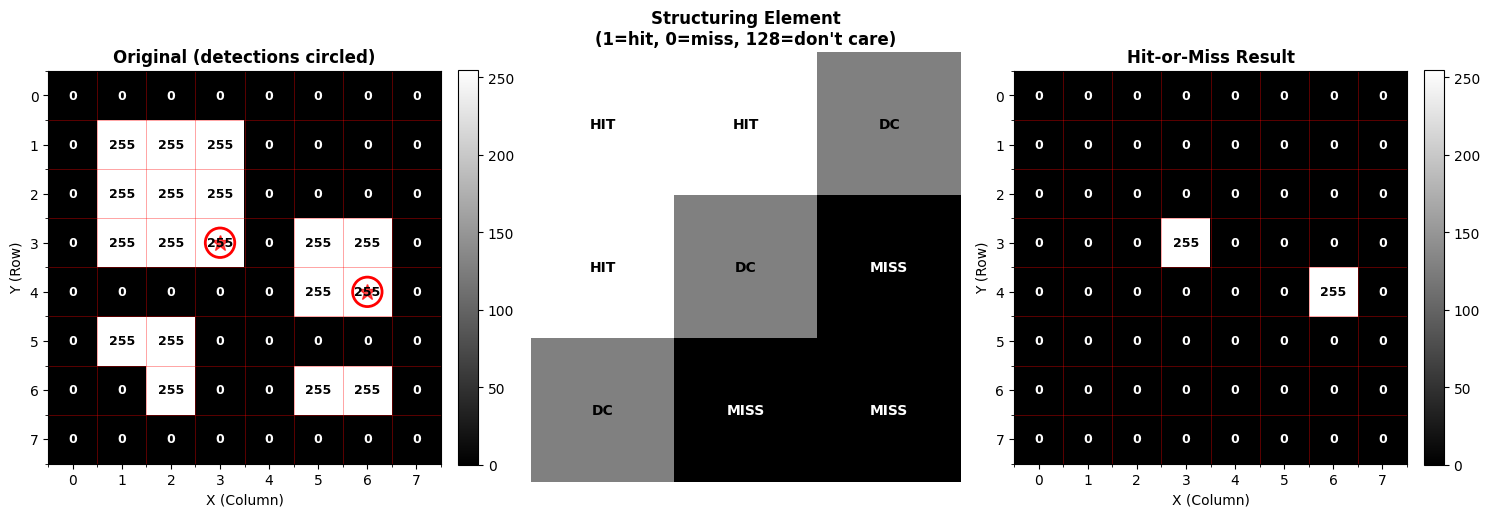

IMAGE ANALYSIS REPORT

1. Original Image Features:
----------------------------------------
Total white pixels: 18

Potential 2x2 white blocks:
  Block at top-left (1, 1): pixels at (1,1), (2,1), (1,2), (2,2)
  Block at top-left (2, 1): pixels at (2,1), (3,1), (2,2), (3,2)
  Block at top-left (1, 2): pixels at (1,2), (2,2), (1,3), (2,3)
  Block at top-left (2, 2): pixels at (2,2), (3,2), (2,3), (3,3)
  Block at top-left (5, 3): pixels at (5,3), (6,3), (5,4), (6,4)

2. Structuring Element Analysis:
----------------------------------------
Pattern being searched for:
  Top-left corner of a 2x2 white block where:
    - The 2x2 block (positions (0,0), (1,0), (0,1), (1,1)) is white
    - The diagonal and adjacent positions are black

Structuring element coordinates (relative to center):
  Position (-1, -1): MUST be white (255)
  Position (0, -1): MUST be white (255)
  Position (1, -1): Don't care
  Position (-1, 0): MUST be white (255)
  Position (0, 0): Don't care
  Position (1, 0): MUST b

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Create a sample binary image
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 255, 0],
    [0, 0, 0, 0, 0, 255, 255, 0],
    [0, 255, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

# Define structuring elements for hit-and-miss
# Looking for top-left corners of 2x2 white blocks
hit = np.array([
    [1, 1, 0],
    [1, 0, -1],
    [0, -1, -1]
])

# Alternative: Looking for isolated white pixels
hit_alt = np.array([
    [-1, -1, -1],
    [-1, 1, -1],
    [-1, -1, -1]
])

# Apply hit-or-miss transform using scipy
result = ndimage.binary_hit_or_miss(image/255, 
                                    structure1=(hit == 1),
                                    structure2=(hit == -1))

# Convert boolean result to 0/255
result_image = result.astype(np.uint8) * 255

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image with grid
im1 = axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image with Grid', fontsize=12, fontweight='bold')
axes[0].axis('on')

# Add grid lines
axes[0].set_xticks(np.arange(-0.5, 8, 1), minor=True)
axes[0].set_yticks(np.arange(-0.5, 8, 1), minor=True)
axes[0].grid(which='minor', color='red', linestyle='-', linewidth=0.5, alpha=0.5)

# Set axis labels
axes[0].set_xticks(range(8))
axes[0].set_yticks(range(8))
axes[0].set_xlabel('X (Column)', fontsize=10)
axes[0].set_ylabel('Y (Row)', fontsize=10)

# Add pixel value annotations
for i in range(8):
    for j in range(8):
        color = 'white' if image[i, j] < 128 else 'black'
        axes[0].text(j, i, f'{image[i, j]}', ha='center', va='center', 
                    color=color, fontsize=9, fontweight='bold')

plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Structuring element visualization
se_vis = np.full((3, 3), 128)  # Gray for don't care
se_vis[hit == 1] = 255         # White for hit
se_vis[hit == -1] = 0          # Black for miss

im2 = axes[1].imshow(se_vis, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Structuring Element\n(1=hit, 0=miss, 128=don\'t care)', 
                 fontsize=12, fontweight='bold')
axes[1].axis('off')
# Add text annotations
for i in range(3):
    for j in range(3):
        if hit[i, j] == 1:
            text = 'HIT'
            color = 'black'
        elif hit[i, j] == -1:
            text = 'MISS'
            color = 'white'
        else:
            text = 'DC'
            color = 'black'
        axes[1].text(j, i, text, ha='center', va='center', 
                    color=color, fontweight='bold', fontsize=10)

# Add grid to structuring element
axes[1].set_xticks(np.arange(-0.5, 3, 1), minor=True)
axes[1].set_yticks(np.arange(-0.5, 3, 1), minor=True)
axes[1].grid(which='minor', color='red', linestyle='-', linewidth=0.5, alpha=0.5)
axes[1].set_xticks(range(3))
axes[1].set_yticks(range(3))

# Result image
im3 = axes[2].imshow(result_image, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Hit-or-Miss Result', fontsize=12, fontweight='bold')
axes[2].axis('on')

# Add grid to result image
axes[2].set_xticks(np.arange(-0.5, 8, 1), minor=True)
axes[2].set_yticks(np.arange(-0.5, 8, 1), minor=True)
axes[2].grid(which='minor', color='red', linestyle='-', linewidth=0.5, alpha=0.5)

axes[2].set_xticks(range(8))
axes[2].set_yticks(range(8))
axes[2].set_xlabel('X (Column)', fontsize=10)
axes[2].set_ylabel('Y (Row)', fontsize=10)

# Add pixel value annotations to result
for i in range(8):
    for j in range(8):
        color = 'white' if result_image[i, j] < 128 else 'black'
        axes[2].text(j, i, f'{result_image[i, j]}', ha='center', va='center', 
                    color=color, fontsize=9, fontweight='bold')

plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

# Mark detected corners on original image for clarity
axes[0].set_title('Original (detections circled)', fontsize=12, fontweight='bold')
for y in range(result.shape[0]):
    for x in range(result.shape[1]):
        if result[y, x]:
            # Add a red circle to show detection
            circle = plt.Circle((x, y), 0.3, color='red', fill=False, linewidth=2)
            axes[0].add_patch(circle)
            # Also add a star at the same location
            axes[0].plot(x, y, 'r*', markersize=12, alpha=0.7)

plt.tight_layout()
plt.show()

# Print coordinates of detected patterns with more detail
print("="*60)
print("IMAGE ANALYSIS REPORT")
print("="*60)

print("\n1. Original Image Features:")
print("-" * 40)
# Find all white regions
white_pixels = np.argwhere(image == 255)
print(f"Total white pixels: {len(white_pixels)}")

# Find 2x2 blocks
print("\nPotential 2x2 white blocks:")
for y in range(7):  # Up to 6 because we need y+1
    for x in range(7):  # Up to 6 because we need x+1
        if (image[y:y+2, x:x+2] == 255).all():
            print(f"  Block at top-left ({x}, {y}): pixels at "
                  f"({x},{y}), ({x+1},{y}), ({x},{y+1}), ({x+1},{y+1})")

print("\n2. Structuring Element Analysis:")
print("-" * 40)
print("Pattern being searched for:")
print("  Top-left corner of a 2x2 white block where:")
print("    - The 2x2 block (positions (0,0), (1,0), (0,1), (1,1)) is white")
print("    - The diagonal and adjacent positions are black")
print("\nStructuring element coordinates (relative to center):")
for i in range(3):
    for j in range(3):
        if hit[i, j] == 1:
            status = "MUST be white (255)"
        elif hit[i, j] == -1:
            status = "MUST be black (0)"
        else:
            status = "Don't care"
        print(f"  Position ({j-1}, {i-1}): {status}")

print("\n3. Detection Results:")
print("-" * 40)
detected = np.argwhere(result)
if len(detected) > 0:
    print(f"Found {len(detected)} pattern(s):")
    for idx, (y, x) in enumerate(detected, 1):
        print(f"\n  Detection {idx} at position ({x}, {y}):")
        print("  Checking 3x3 neighborhood around this point:")
        # Extract and print the neighborhood
        for i in range(max(0, y-1), min(8, y+2)):
            row_vals = []
            for j in range(max(0, x-1), min(8, x+2)):
                if i == y and j == x:
                    row_vals.append(f"[{image[i, j]:3d}]")  # Center point
                else:
                    row_vals.append(f"{image[i, j]:3d}")
            print("    " + " ".join(row_vals))
else:
    print("No patterns detected.")

print("\n4. Expected vs Actual:")
print("-" * 40)
print("Expected detections at: (1,1) and (5,3)")
print(f"Actual detections at: {[(x,y) for y,x in detected]}")

print("\n" + "="*60)